# Проект e-learning: вариант 2

Продакт-менеджер Василий попросил вас проанализировать завершенные уроки и ответить на следующие вопросы:

1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов).

2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой 
    и самой высокой завершаемостью*. (5 баллов)

3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение 
                                                              экзамена студентом). (5 баллов) 

4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком 
(ТОП-3). (8 баллов)

5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми 
долгими средними сроками сдачи курсов.  (10 баллов) 

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй 
адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь 
выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество 
баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы 
метрик recency, frequency и monetary для интерпретации этих кластеров. Описание подхода можно найти тут. (35 баллов)

Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться курсом. Обосновать 
свой выбор ты можешь с помощью фактов сдачи экзаменов, распределения студентов и уникальный идентефикатор курса.

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

Файлы: 

    assessments.csv — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает 
    ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

code_module — идентификационный код предмета.

code_presentation — семестр (Идентификационный код).

id_assessment — тест (Идентификационный номер ассессмента).

assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), 
    экзамен по курсу (Exam).

date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. 
Дата начала семестра имеет номер 0 (ноль).

weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех 
остальных оценок составляет 100%.

    
    courses.csv — файл содержит список предметов по семестрам.

code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код).

module_presentation_length — продолжительность семестра в днях.

    
    studentAssessment.csv — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на 
    оценку, результат не записывается в таблицу.

id_assessment — тест (идентификационный номер).

id_student — идентификационный номер студента.

date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из 
                                                       академического отпуска).

score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

    
    studentRegistration.csv — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения 
    курса в семестре.

code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код)

id_student — идентификационный номер студента.

date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра 
(например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
assessments = pd.read_csv('assessments.csv')
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [3]:
assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [4]:
courses = pd.read_csv('courses.csv')
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [5]:
studentAssessment = pd.read_csv('studentAssessment.csv')
studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [6]:
studentRegistration = pd.read_csv('studentRegistration.csv')
studentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


курс - это предмет с экзаменом

1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов).

In [7]:
assessments_stud = assessments.merge(studentAssessment, on='id_assessment')
assessments_stud

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0
...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37437,TMA,173.0,0.0,652462,172,0,60.0
173908,GGG,2014J,37437,TMA,173.0,0.0,652539,176,0,75.0
173909,GGG,2014J,37437,TMA,173.0,0.0,653157,187,0,70.0
173910,GGG,2014J,37437,TMA,173.0,0.0,653252,171,0,70.0


In [8]:
assessments_stud.query("assessment_type == 'Exam' and score >=40.0") \
    .groupby('id_student', as_index=False) \
    .agg({'code_module': 'count'}) \
    .query('code_module == 1')

,id_student,code_module
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4092,2694886,1
4093,2694933,1
4094,2695608,1
4095,2697181,1


2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой 
    и самой высокой завершаемостью*. (5 баллов)

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [9]:
assessments_stud_uspeh = assessments_stud.query("assessment_type == 'Exam' and score >=40.0") \
    .groupby(['code_module', 'id_assessment'], as_index=False) \
    .agg({'id_student': 'count'}) \
    .sort_values('id_student') \
    .rename(columns={'id_student': 'exam_uspeh'})
assessments_stud_uspeh

,code_module,id_assessment,exam_uspeh
4,DDD,25361,485
2,DDD,25340,504
0,CCC,24290,664
5,DDD,25368,842
3,DDD,25354,878
1,CCC,24299,1019


In [10]:
assessments_stud_all = assessments_stud.query("assessment_type == 'Exam' ") \
    .groupby(['code_module', 'id_assessment'], as_index=False) \
    .agg({'id_student': 'count'}) \
    .sort_values('id_student') \
    .rename(columns={'id_student': 'exam_all'}) 
assessments_stud_all

,code_module,id_assessment,exam_all
4,DDD,25361,524
2,DDD,25340,602
0,CCC,24290,747
5,DDD,25368,950
3,DDD,25354,968
1,CCC,24299,1168


In [11]:
assessments_stud_all = assessments_stud.query("assessment_type == 'Exam' ") \
    .groupby(['code_module', 'id_assessment'], as_index=False) \
    .agg({'id_student': 'count'}) \
    .sort_values('id_student') \
    .rename(columns={'id_student': 'exam_all'}) \
    .assign(perc = assessments_stud_uspeh.exam_uspeh / assessments_stud_all.exam_all) \
    .sort_values('perc')
assessments_stud_all

,code_module,id_assessment,exam_all,perc
2,DDD,25340,602,0.837209
1,CCC,24299,1168,0.872432
5,DDD,25368,950,0.886316
0,CCC,24290,747,0.888889
3,DDD,25354,968,0.907025
4,DDD,25361,524,0.925573


In [12]:
assessments_stud_uspeh_2 = assessments_stud.query("assessment_type == 'Exam' and score >=40.0") \
    .groupby('code_module', as_index=False) \
    .agg({'id_student': 'count'}) \
    .sort_values('id_student')
assessments_stud_uspeh_2

,code_module,id_student
0,CCC,1683
1,DDD,2709


In [13]:
assessments_stud_all_2 = assessments_stud.query("assessment_type == 'Exam' ") \
    .groupby('code_module', as_index=False) \
    .agg({'id_student': 'count'}) \
    .sort_values('id_student')
assessments_stud_all_2

,code_module,id_student
0,CCC,1915
1,DDD,3044


In [14]:
assessments_stud_all_2 = assessments_stud.query("assessment_type == 'Exam' ") \
    .groupby('code_module', as_index=False) \
    .agg({'id_student': 'count'}) \
    .sort_values('id_student') \
    .assign(pecr= assessments_stud_uspeh_2.id_student / assessments_stud_all_2.id_student)
assessments_stud_all_2

,code_module,id_student,pecr
0,CCC,1915,0.878851
1,DDD,3044,0.889947


3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение           экзамена студентом). (5 баллов) 

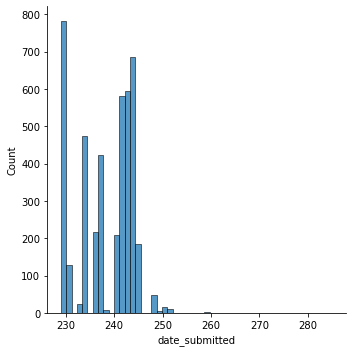

In [15]:
sns.displot(assessments_stud.query("assessment_type == 'Exam' and score >=40.0").date_submitted)

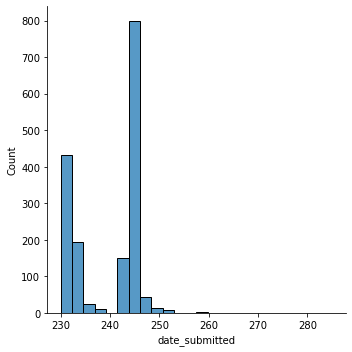

In [16]:
sns.displot(assessments_stud.query("assessment_type == 'Exam' and score >=40.0 and code_module == 'CCC'").date_submitted)

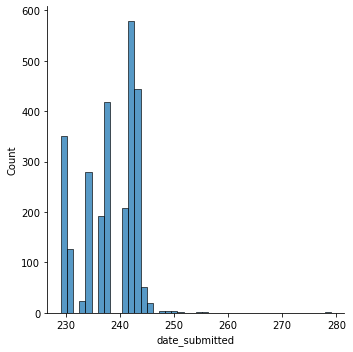

In [17]:
sns.displot(assessments_stud.query("assessment_type == 'Exam' and score >=40.0 and code_module == 'DDD'").date_submitted)

In [18]:
assessments_stud.query("assessment_type == 'Exam' and score >=40.0") \
    .groupby('code_module', as_index=False) \
    .agg({'date_submitted': ['mean','median', 'min', 'max']})

code_module date_submitted                 
                        mean median  min  max
0         CCC     239.345217  244.0  230  285
1         DDD     237.976006  237.0  229  279

4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком 
(ТОП-3). (8 баллов)

In [19]:
studentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [20]:
studentRegistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [21]:
studentRegistration \
    .groupby('code_module', as_index=False) \
    .agg({'date_registration': 'count'}) \
    .sort_values('date_registration', ascending=False) \
    .head(3)

,code_module,date_registration
1,BBB,7900
5,FFF,7751
3,DDD,6257


In [22]:
studentRegistration \
    .groupby('code_module', as_index=False) \
    .agg({'date_unregistration': 'count'}) \
    .sort_values('date_unregistration', ascending=False) \
    .head(3)

,code_module,date_unregistration
5,FFF,2380
1,BBB,2377
3,DDD,2235


5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми 
долгими средними сроками сдачи курсов.  (10 баллов) 

In [23]:
assessments_stud_all_2 = assessments_stud.query("assessment_type == 'Exam'") \
    .groupby('code_presentation', as_index=False) \
    .agg({'date_submitted': 'median', 'id_student': 'count'}) \
    .rename(columns={'id_student': 'all_stud'})
assessments_stud_all_2

,code_presentation,date_submitted,all_stud
0,2013B,230.0,602
1,2013J,241.0,968
2,2014B,234.0,1271
3,2014J,244.0,2118


In [24]:
assessments_stud_uspeh_2 = assessments_stud.query("assessment_type == 'Exam' and score >=40.0") \
    .groupby('code_presentation', as_index=False) \
    .agg({'date_submitted': 'median', 'id_student': 'count'}) \
    .rename(columns={'id_student': 'uspeh_stud'})
assessments_stud_uspeh_2

,code_presentation,date_submitted,uspeh_stud
0,2013B,230.0,504
1,2013J,241.0,878
2,2014B,234.0,1149
3,2014J,244.0,1861


In [25]:
assessments_stud_all_2 \
    .assign(uspeh_stud = assessments_stud_uspeh_2.uspeh_stud) \
    .assign(pecr = assessments_stud_uspeh_2.uspeh_stud / assessments_stud_all_2.all_stud)

,code_presentation,date_submitted,all_stud,uspeh_stud,pecr
0,2013B,230.0,602,504,0.837209
1,2013J,241.0,968,878,0.907025
2,2014B,234.0,1271,1149,0.904013
3,2014J,244.0,2118,1861,0.878659


6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй 
адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь 
выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество 
баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы 
метрик recency, frequency и monetary для интерпретации этих кластеров. Описание подхода можно найти тут. (35 баллов)

In [26]:
stud_all = assessments_stud.query("assessment_type == 'Exam'") \
    .groupby('id_student', as_index=False) \
    .agg({'code_module': 'count'})
stud_all

,id_student,code_module
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4628,2694886,1
4629,2694933,1
4630,2695608,1
4631,2697181,1


In [27]:
stud_uspeh = assessments_stud.query("assessment_type == 'Exam' and score >=40.0") \
    .groupby('id_student', as_index=False) \
    .agg({'code_module': 'count'})
stud_uspeh

,id_student,code_module
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4092,2694886,1
4093,2694933,1
4094,2695608,1
4095,2697181,1


In [28]:
stud = stud_all.merge(stud_uspeh, on='id_student', how='left')
stud['zaversh'] = stud.code_module_y / stud.code_module_x
stud

,id_student,code_module_x,code_module_y,zaversh
0,23698,1,1.0,1.0
1,24213,1,1.0,1.0
2,27116,1,1.0,1.0
3,28046,1,1.0,1.0
4,28787,1,1.0,1.0
...,...,...,...,...
4628,2694886,1,1.0,1.0
4629,2694933,1,1.0,1.0
4630,2695608,1,1.0,1.0
4631,2697181,1,1.0,1.0


In [61]:
rfmSegmentation = assessments_stud.query("assessment_type == 'Exam'") \
    .merge(stud, on='id_student', how='left') \
    .groupby('id_student', as_index=False) \
    .agg({'date_submitted': 'mean', 'zaversh': 'count', 'score' : 'mean'}) \
    .rename(columns={'date_submitted':'recency', 'zaversh':'frequency', 'score':'monetary'})
rfmSegmentation

,id_student,recency,frequency,monetary
0,23698,243.0,1,80.0
1,24213,236.0,1,58.0
2,27116,243.0,1,96.0
3,28046,237.0,1,40.0
4,28787,243.0,1,44.0
...,...,...,...,...
4628,2694886,236.0,1,69.0
4629,2694933,230.0,1,73.0
4630,2695608,237.0,1,73.0
4631,2697181,230.0,1,80.0


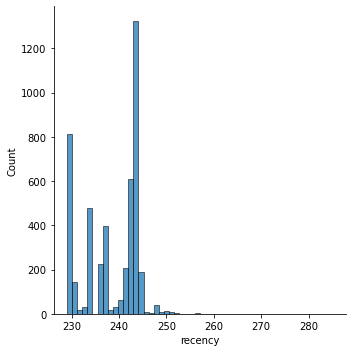

In [62]:
sns.displot(rfmSegmentation.recency)

In [63]:
rfmSegmentation.recency.describe()

count    4633.000000
mean      238.462227
std         5.653378
min       229.000000
25%       234.000000
50%       241.000000
75%       243.000000
max       285.000000
Name: recency, dtype: float64

In [64]:
quantiles_R = rfmSegmentation.recency.quantile([0.25, 0.75])
quantiles_R

0.25    234.0
0.75    243.0
Name: recency, dtype: float64

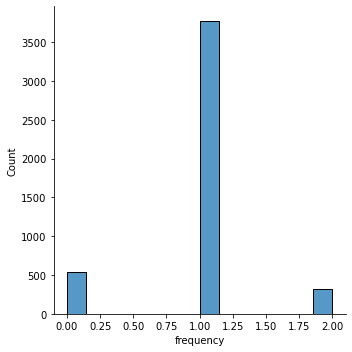

In [65]:
sns.displot(rfmSegmentation.frequency)

In [66]:
rfmSegmentation.frequency.value_counts()

1    3774
0     536
2     323
Name: frequency, dtype: int64

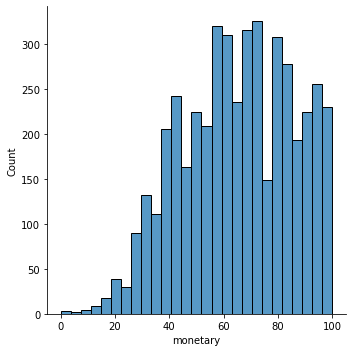

In [67]:
sns.displot(rfmSegmentation.monetary)

In [68]:
quantiles_M = rfmSegmentation.monetary.quantile([0.25, 0.50, 0.75])
quantiles_M

0.25    50.0
0.50    66.0
0.75    82.0
Name: monetary, dtype: float64

In [69]:
def RClass(value):
    if value <= quantiles_R[0.25]:
        return 1
    elif value <= quantiles_R[0.75]: 
        return 2
    else:
        return 3  

In [70]:
def FClass(value):
    if value == 1: 
        return 2
    else:
        return 1

In [71]:
def MClass(value):
    if value <= quantiles_M[0.25]:
        return 4
    elif value <= quantiles_M[0.50]:
        return 3
    elif value <= quantiles_M[0.75]: 
        return 2
    else:
        return 1

In [72]:
rfmSegmentation['R'] = rfmSegmentation['recency'].apply(RClass)

rfmSegmentation['F'] = rfmSegmentation['frequency'].apply(FClass)

rfmSegmentation['M'] = rfmSegmentation['monetary'].apply(MClass)

rfmSegmentation['RFM'] = rfmSegmentation.R.map(str) \
                            + rfmSegmentation.F.map(str) \
                            + rfmSegmentation.M.map(str)

In [73]:
rfmSegmentation

,id_student,recency,frequency,monetary,R,F,M,RFM
0,23698,243.0,1,80.0,2,2,2,222
1,24213,236.0,1,58.0,2,2,3,223
2,27116,243.0,1,96.0,2,2,1,221
3,28046,237.0,1,40.0,2,2,4,224
4,28787,243.0,1,44.0,2,2,4,224
...,...,...,...,...,...,...,...,...
4628,2694886,236.0,1,69.0,2,2,2,222
4629,2694933,230.0,1,73.0,1,2,2,122
4630,2695608,237.0,1,73.0,2,2,2,222
4631,2697181,230.0,1,80.0,1,2,2,122


границы метрик:
    
recency:  
1 — от 234 до 243 дней      
2 — до 234 дней      

frequency:  
1 — 100 сдал  
2 — не сдал

monetary:  
1 — до 50  
2 — от 50 до 66   
3 — от 82   

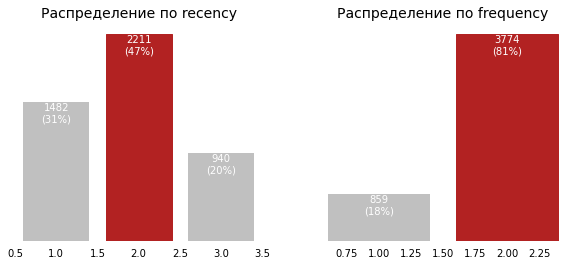

In [74]:
# визуализация пользователей по recency и frequency
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'recency', 'F':'frequency'}
    y = rfmSegmentation[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Распределение по {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

In [77]:
rfm_graf = rfmSegmentation.groupby('RFM', as_index=False) \
    .agg({'id_student': 'count'}) \
    .sort_values('id_student', ascending=False)
rfm_graf.head()

,RFM,id_student
13,222,604
14,223,547
5,122,364
12,221,343
6,123,343


<AxesSubplot:xlabel='RFM', ylabel='id_student'>

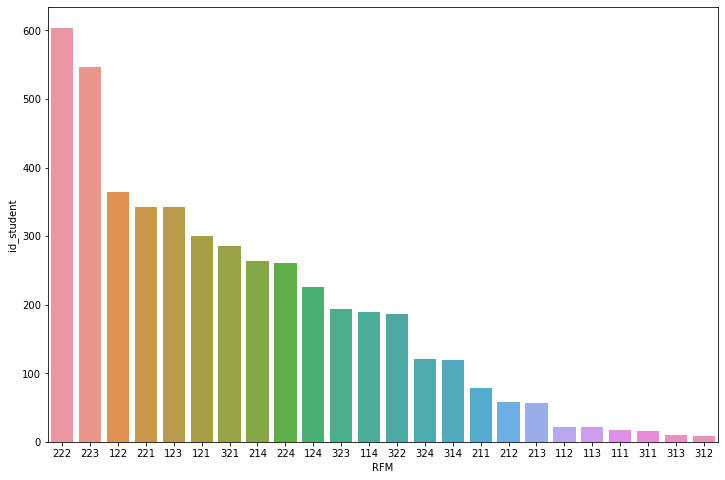

In [86]:
plt.figure(figsize = (12, 8))
sns.barplot(x='RFM', y='id_student', data=rfm_graf)